# Redes Convolucionales en visión por computadoras

Autor: Sofia Lujan

## Trabajo Final: Analizando el Amazonas desde el espacio

En este trabajo, utilizaremos imágenes satelitales del Amazonas para entrenar un modelo de Deep Learning que sea capaz de darnos información acerca del contenido de las mismas.

### Imágenes

Trabajaremos con más de 40.000 imágenes satelitales en RGB donde cada píxel representa un área de 3.7 metros. Los datos provienen de los satélites Flock 2 de la compañía Planet, recolectados entre el 1 de Enero de 2016 y el 1 de Febrero de 2017. Todas las escenas provienen de la cuenca del Amazonas que incluye Brasil, Perú, Uruguay, Colombia, Venezuela, Guyana, Bolivia y Ecuador.

### Etiquetas

Las clases a predecir para cada imágen representan un conjunto de fenómenos de interés que se desean analizar en el Amazonas. Estas etiquetas pueden distribuirse en tres grupos:

- Condiciones atmosféricas
- Fenómenos comunes de cobertura/uso de suelo
- Fenómenos raros de cobertura/uso de suelo

Cada imágen tendrá al menos una, y potencialmente, más de una etiqueta del tipo de condiciones atmosféricas. Así como también cero o varias etiquetas del tipo de fenómenos comunes o raros de cobertura/uso de suelo. Aquellas imágenes etiquetadas como "cloudy" (nublado), no deberían tener ninguna otra anotación, aunque pueden haber errores de anotación.

Puede ocurrir que en muchas imágenes no se haya taggeado todos los fenómenos observables, como así también puede que haya etiquetas incorrectas. El poder trabajar y solucionar problemas relacionados con datos ruidosos será parte del desafío.

![chips.jpg](attachment:chips.jpg)
*Ejemplo de imágenes y sus etiquetas*

Trabajaremos con un total de 17 etiquetas posibles, descritas a continuación:

- **Cloudy:** Imagen completamente nublada que no permite obtener observaciones adicionales.
- **Partly Cloudy:** Imagen parcialmente nublada.
- **Clear:** Imagen sin nubes.
- **Haze:** Imagen con neblina.
- **Primary (rainforest):** Presencia de bosque "virgen" o áreas con alta densidad de vegetación.
- **Water:** Presencia de ríos, embalses o lagos.
- **Habitation:** Presencia de casas o edificios.
- **Agriculture:** Porciones de tierra sin árboles siendo utilizadas para la agricultura.
- **Road:** Caminos o rutas.
- **Cultivation:** Es un subconjunto de Agriculture que se refiere a pequeñas granjas siendo explotadas por una persona o familia como medio de supervivencia.
- **Bare Ground:** Áreas sin presencia de árboles por causas naturales y no como resultado de la actividad humana.
- **Slash and Burn:** Áreas que han sido incendiadas recientemente.
- **Selective Logging:** Zonas de tala selectiva de especies de árboles de alto valor.
- **Blooming:** Es un fenómeno natural donde ciertas especies de árboles, eclosionan, dan frutos y florecen para aumentar las chances de polinización cruzada.
- **Conventional Mining:** Zona con presencia de minería legal a larga escala.
- **"Artisinal" Mining:** Operaciones de minería a baja escala, usualmente ilegales.
- **Blow Down:** Fenómeno natural que ocurre cuando el aire frío y seco de los Andes se asienta sobre el aire cálido y húmedo en la selva. Estos fuertes vientos derriban los árboles más grandes de la selva tropical, y las áreas abiertas resultantes son visibles desde el espacio.

### Aclaraciones finales

Tenga en cuenta que este no se trata de un problema de multi-class classification, sino un problema de [multi-label classification](https://en.wikipedia.org/wiki/Multi-label_classification), dónde para cada imágen se puede predecir mas de una categoría o etiqueta.


## Instalación de librerías

Si desea utilizar Google Colab, recomiendo ejecutar este comando para actualizar e instalar la versión 2.0 de `tensorflow-gpu` (la versión instalada por defecto de tensorflow sólo corre en CPU).

In [1]:
!pip uninstall tensorflow && pip install -U tensorflow-gpu==2.0.0 keras==2.3.1

Uninstalling tensorflow-1.15.0:
  Would remove:
    /usr/local/bin/estimator_ckpt_converter
    /usr/local/bin/freeze_graph
    /usr/local/bin/saved_model_cli
    /usr/local/bin/tensorboard
    /usr/local/bin/tf_upgrade_v2
    /usr/local/bin/tflite_convert
    /usr/local/bin/toco
    /usr/local/bin/toco_from_protos
    /usr/local/lib/python3.6/dist-packages/tensorflow-1.15.0.dist-info/*
    /usr/local/lib/python3.6/dist-packages/tensorflow/*
    /usr/local/lib/python3.6/dist-packages/tensorflow_core/*
Proceed (y/n)? y
  Successfully uninstalled tensorflow-1.15.0
     |████████████████████████████████| 380.8MB 15kB/s 
     |████████████████████████████████| 378kB 45.9MB/s 
     |████████████████████████████████| 450kB 54.5MB/s 
     |████████████████████████████████| 3.8MB 41.3MB/s 
     |████████████████████████████████| 81kB 8.8MB/s 
ERROR: fancyimpute 0.4.3 requires tensorflow, which is not installed.
ERROR: tensorboard 2.0.2 has requirement grpcio>=1.24.3, but you'll have grpcio 1.1

## Obtención de datos

Para descargar las imágenes y sus correspondientes etiquetas, puede ejecutar los siguiente comandos directamente desde el notebook.

In [2]:
# Descargar dataset de imágenes desde Google Drive
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1--zzWhWfDnSZMtIcUfMyc10ZZPH3ZdnM' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1--zzWhWfDnSZMtIcUfMyc10ZZPH3ZdnM" -O 'train-jpg.tar' && rm -rf /tmp/cookies.txt

--2019-11-29 02:38:22--  https://docs.google.com/uc?export=download&confirm=Csle&id=1--zzWhWfDnSZMtIcUfMyc10ZZPH3ZdnM
Resolving docs.google.com (docs.google.com)... 172.217.212.139, 172.217.212.113, 172.217.212.138, ...
Connecting to docs.google.com (docs.google.com)|172.217.212.139|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-08-2s-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/t5k6lf04qpqn0p5pinoeiu8u41eo5fe2/1574992800000/12900783405973182389/*/1--zzWhWfDnSZMtIcUfMyc10ZZPH3ZdnM?e=download [following]
--2019-11-29 02:38:22--  https://doc-08-2s-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/t5k6lf04qpqn0p5pinoeiu8u41eo5fe2/1574992800000/12900783405973182389/*/1--zzWhWfDnSZMtIcUfMyc10ZZPH3ZdnM?e=download
Resolving doc-08-2s-docs.googleusercontent.com (doc-08-2s-docs.googleusercontent.com)... 172.217.212.132, 2607:f8b0:4001:c03::84
Connecting to doc-08-2s-docs.googleuserconten

In [3]:
# Extraemos las imágenes
!tar -xvf train-jpg.tar

train-jpg/
train-jpg/train_21777.jpg
train-jpg/train_34567.jpg
train-jpg/train_7212.jpg
train-jpg/train_11485.jpg
train-jpg/train_14111.jpg
train-jpg/train_8634.jpg
train-jpg/train_27649.jpg
train-jpg/train_8459.jpg
train-jpg/train_12520.jpg
train-jpg/train_25962.jpg
train-jpg/train_14764.jpg
train-jpg/train_17626.jpg
train-jpg/train_25677.jpg
train-jpg/train_9660.jpg
train-jpg/train_1366.jpg
train-jpg/train_26122.jpg
train-jpg/train_24548.jpg
train-jpg/train_17415.jpg
train-jpg/train_25901.jpg
train-jpg/train_23389.jpg
train-jpg/train_25095.jpg
train-jpg/train_12922.jpg
train-jpg/train_19885.jpg
train-jpg/train_37550.jpg
train-jpg/train_21305.jpg
train-jpg/train_40436.jpg
train-jpg/train_31247.jpg
train-jpg/train_1837.jpg
train-jpg/train_6289.jpg
train-jpg/train_36691.jpg
train-jpg/train_16062.jpg
train-jpg/train_28673.jpg
train-jpg/train_22394.jpg
train-jpg/train_14346.jpg
train-jpg/train_13177.jpg
train-jpg/train_12481.jpg
train-jpg/train_3923.jpg
train-jpg/train_36787.jpg
train-jpg

In [4]:
# Descargar etiquetas desde Google Drive
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1UB3LTf73QrXggGQqzUCLjntxmfA90aDb' -O 'train-jpg-labels.pkl'

--2019-11-29 02:38:50--  https://docs.google.com/uc?export=download&id=1UB3LTf73QrXggGQqzUCLjntxmfA90aDb
Resolving docs.google.com (docs.google.com)... 74.125.124.139, 74.125.124.101, 74.125.124.138, ...
Connecting to docs.google.com (docs.google.com)|74.125.124.139|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-08-2s-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/epkshe21p6q2np4dactpm6c16j9lslfs/1574992800000/12900783405973182389/*/1UB3LTf73QrXggGQqzUCLjntxmfA90aDb?e=download [following]
--2019-11-29 02:38:51--  https://doc-08-2s-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/epkshe21p6q2np4dactpm6c16j9lslfs/1574992800000/12900783405973182389/*/1UB3LTf73QrXggGQqzUCLjntxmfA90aDb?e=download
Resolving doc-08-2s-docs.googleusercontent.com (doc-08-2s-docs.googleusercontent.com)... 172.217.212.132, 2607:f8b0:4001:c03::84
Connecting to doc-08-2s-docs.googleusercontent.com (doc-08-2s-

## Librerias a utilizar

Es obligatorio el uso de `Keras` y `tensorflow` para la creación y entrenamiento de su modelo de Deep Learning.

In [5]:
import tensorflow.keras.layers as Layers
import tensorflow.keras.activations as Actications
import tensorflow.keras.models as Models
import tensorflow.keras.optimizers as Optimizer
import tensorflow.keras.metrics as Metrics
import tensorflow.keras.utils as Utils
from keras.utils.vis_utils import model_to_dot
import os
import matplotlib.pyplot as plot
import cv2
import numpy as np
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix as CM
from random import randint
from IPython.display import SVG
import matplotlib.gridspec as gridspec
import pandas as pd
from keras.preprocessing.image import ImageDataGenerator  
from keras.applications import densenet  
from keras.models import Sequential, Model, load_model  
from keras.layers import Conv2D, MaxPooling2D  
from keras.layers import Activation, Dropout, Flatten, Dense  
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint, Callback  
from keras import regularizers  
from keras import backend as K  

Using TensorFlow backend.


## Exploración y análisis

Utilice esta sección para explorar las imágenes y sus etiquetas asociadas. Sugerencias:

- Analice la distribución de los datos.
    - ¿Está el dataset balanceado?
    - ¿Cuál es el tamaño de las imágenes?
- Analice la correlación entre etiquetas.
- Visualice imágenes y relaciones patrones presentes en cada una.

**Ayuda:** Para cargar las etiquetas recomiendo utilizar la función [read_pickle](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_pickle.html) de la librería `Pandas`.

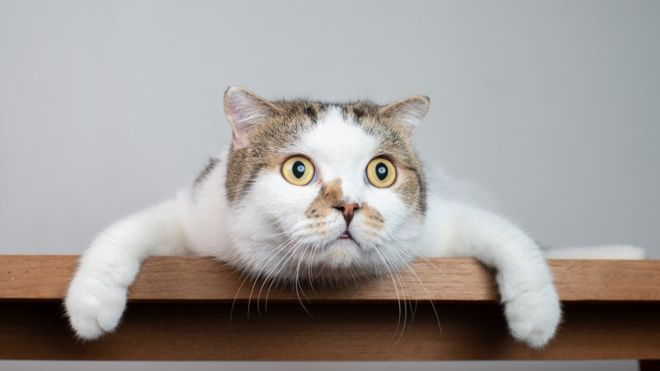

In [6]:
unpickled_df = pd.read_pickle("train-jpg-labels.pkl")
unpickled_df['tags']

0                                          [haze, primary]
1                     [agriculture, clear, primary, water]
2                                         [clear, primary]
3                                         [clear, primary]
4          [agriculture, clear, habitation, primary, road]
                               ...                        
40474                                     [clear, primary]
40475                                             [cloudy]
40476                        [agriculture, clear, primary]
40477                  [agriculture, clear, primary, road]
40478    [agriculture, cultivation, partly_cloudy, prim...
Name: tags, Length: 40479, dtype: object

In [0]:
tags_df = pd.DataFrame(unpickled_df['tags'].tolist())

In [11]:
tags_obj = tags_df.stack()
tags_obj

0      0             haze
       1          primary
1      0      agriculture
       1            clear
       2          primary
                ...      
40477  3             road
40478  0      agriculture
       1      cultivation
       2    partly_cloudy
       3          primary
Length: 116278, dtype: object

In [12]:
tags_df = pd.get_dummies(tags_obj)
tags_df

agriculture  artisinal_mine  ...  slash_burn  water
0     0            0               0  ...           0      0
      1            0               0  ...           0      0
1     0            1               0  ...           0      0
      1            0               0  ...           0      0
      2            0               0  ...           0      0
...              ...             ...  ...         ...    ...
40477 3            0               0  ...           0      0
40478 0            1               0  ...           0      0
      1            0               0  ...           0      0
      2            0               0  ...           0      0
      3            0               0  ...           0      0

[116278 rows x 17 columns]

In [13]:
tags_df = tags_df.sum(level=0)
tags_df

agriculture  artisinal_mine  ...  slash_burn  water
0                0               0  ...           0      0
1                1               0  ...           0      1
2                0               0  ...           0      0
3                0               0  ...           0      0
4                1               0  ...           0      0
...            ...             ...  ...         ...    ...
40474            0               0  ...           0      0
40475            0               0  ...           0      0
40476            1               0  ...           0      0
40477            1               0  ...           0      0
40478            1               0  ...           0      0

[40479 rows x 17 columns]

In [0]:
unpickled_df = pd.concat([unpickled_df, tags_df], axis=1)

In [15]:
unpickled_df

image_name  ... water
0          train-jpg/train_0.jpg  ...     0
1          train-jpg/train_1.jpg  ...     1
2          train-jpg/train_2.jpg  ...     0
3          train-jpg/train_3.jpg  ...     0
4          train-jpg/train_4.jpg  ...     0
...                          ...  ...   ...
40474  train-jpg/train_40474.jpg  ...     0
40475  train-jpg/train_40475.jpg  ...     0
40476  train-jpg/train_40476.jpg  ...     0
40477  train-jpg/train_40477.jpg  ...     0
40478  train-jpg/train_40478.jpg  ...     0

[40479 rows x 19 columns]

### Distribución de clases

[Text(0, 0, 'agriculture'),
 Text(0, 0, 'artisinal_mine'),
 Text(0, 0, 'bare_ground'),
 Text(0, 0, 'blooming'),
 Text(0, 0, 'blow_down'),
 Text(0, 0, 'clear'),
 Text(0, 0, 'cloudy'),
 Text(0, 0, 'conventional_mine'),
 Text(0, 0, 'cultivation'),
 Text(0, 0, 'habitation'),
 Text(0, 0, 'haze'),
 Text(0, 0, 'partly_cloudy'),
 Text(0, 0, 'primary'),
 Text(0, 0, 'road'),
 Text(0, 0, 'selective_logging'),
 Text(0, 0, 'slash_burn'),
 Text(0, 0, 'water')]

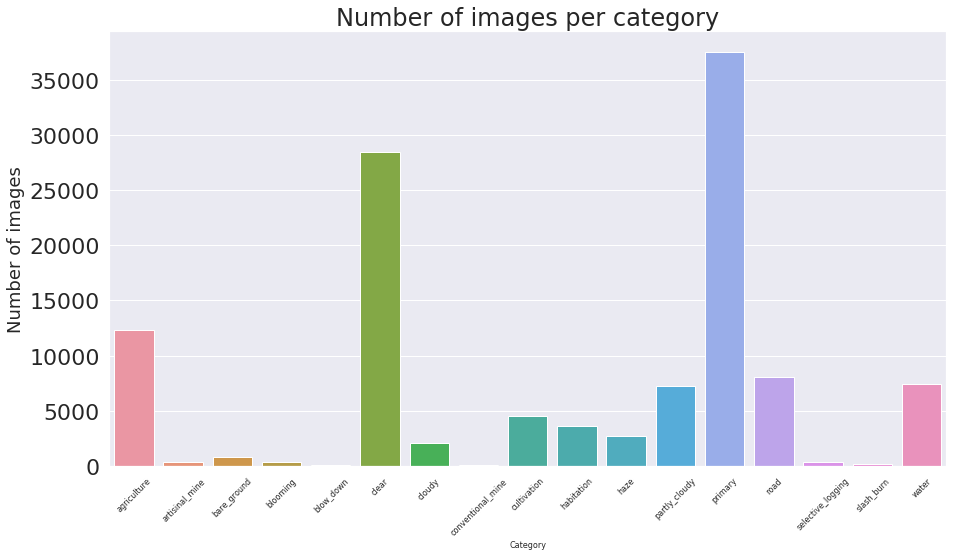

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt
categories = list(unpickled_df.columns.values[2:])
sns.set(font_scale = 2)
plt.figure(figsize=(15,8))
ax= sns.barplot(categories, unpickled_df.iloc[:,2:].sum().values)
plt.title("Number of images per category", fontsize=24)
plt.ylabel('Number of images', fontsize=18)
plt.xlabel('Category', fontsize=8)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, fontsize=8)

### Mapa de correlación entre las etiquetas

In [0]:
corr = unpickled_df[2:].corr()

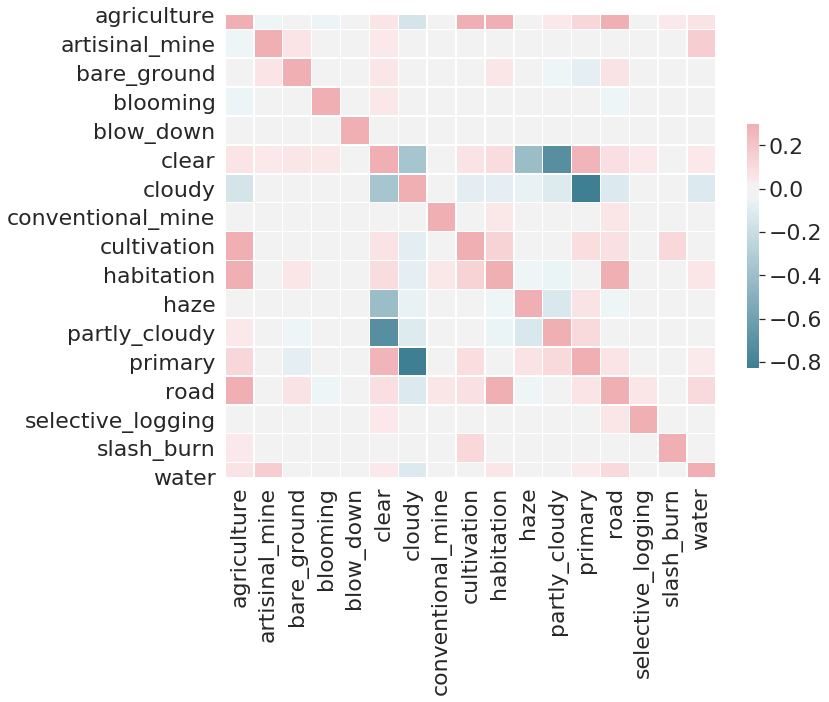

In [0]:
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

- Se observa poca correlacion entre los tag 
 * *cloudy* y *primary*
 * *partly_cloudy* y *clear* 
 * *cloudy* y *clear*.
 * *haze* y *clear*
- Se observa correlacion alta entre:
  *   *road* y *agriculture*
  *   *habitation* y *agriculture*
  * *agriculture* y *cultivation*
  * *primary* y *clear*
  * *primary* y *agriculture*




### Display 10 images per class

In [16]:
categories = list(unpickled_df.columns.values[2:])
print(categories)
image_list = []
label_list = []
for index,cat in enumerate(categories):
  data_sample_images = list(unpickled_df[unpickled_df[cat]==1]['image_name'].head(3))
  for each in data_sample_images:
    label_list.append(cat)
  image_list.append(data_sample_images)
  

print(label_list)

['agriculture', 'artisinal_mine', 'bare_ground', 'blooming', 'blow_down', 'clear', 'cloudy', 'conventional_mine', 'cultivation', 'habitation', 'haze', 'partly_cloudy', 'primary', 'road', 'selective_logging', 'slash_burn', 'water']
['agriculture', 'agriculture', 'agriculture', 'artisinal_mine', 'artisinal_mine', 'artisinal_mine', 'bare_ground', 'bare_ground', 'bare_ground', 'blooming', 'blooming', 'blooming', 'blow_down', 'blow_down', 'blow_down', 'clear', 'clear', 'clear', 'cloudy', 'cloudy', 'cloudy', 'conventional_mine', 'conventional_mine', 'conventional_mine', 'cultivation', 'cultivation', 'cultivation', 'habitation', 'habitation', 'habitation', 'haze', 'haze', 'haze', 'partly_cloudy', 'partly_cloudy', 'partly_cloudy', 'primary', 'primary', 'primary', 'road', 'road', 'road', 'selective_logging', 'selective_logging', 'selective_logging', 'slash_burn', 'slash_burn', 'slash_burn', 'water', 'water', 'water']


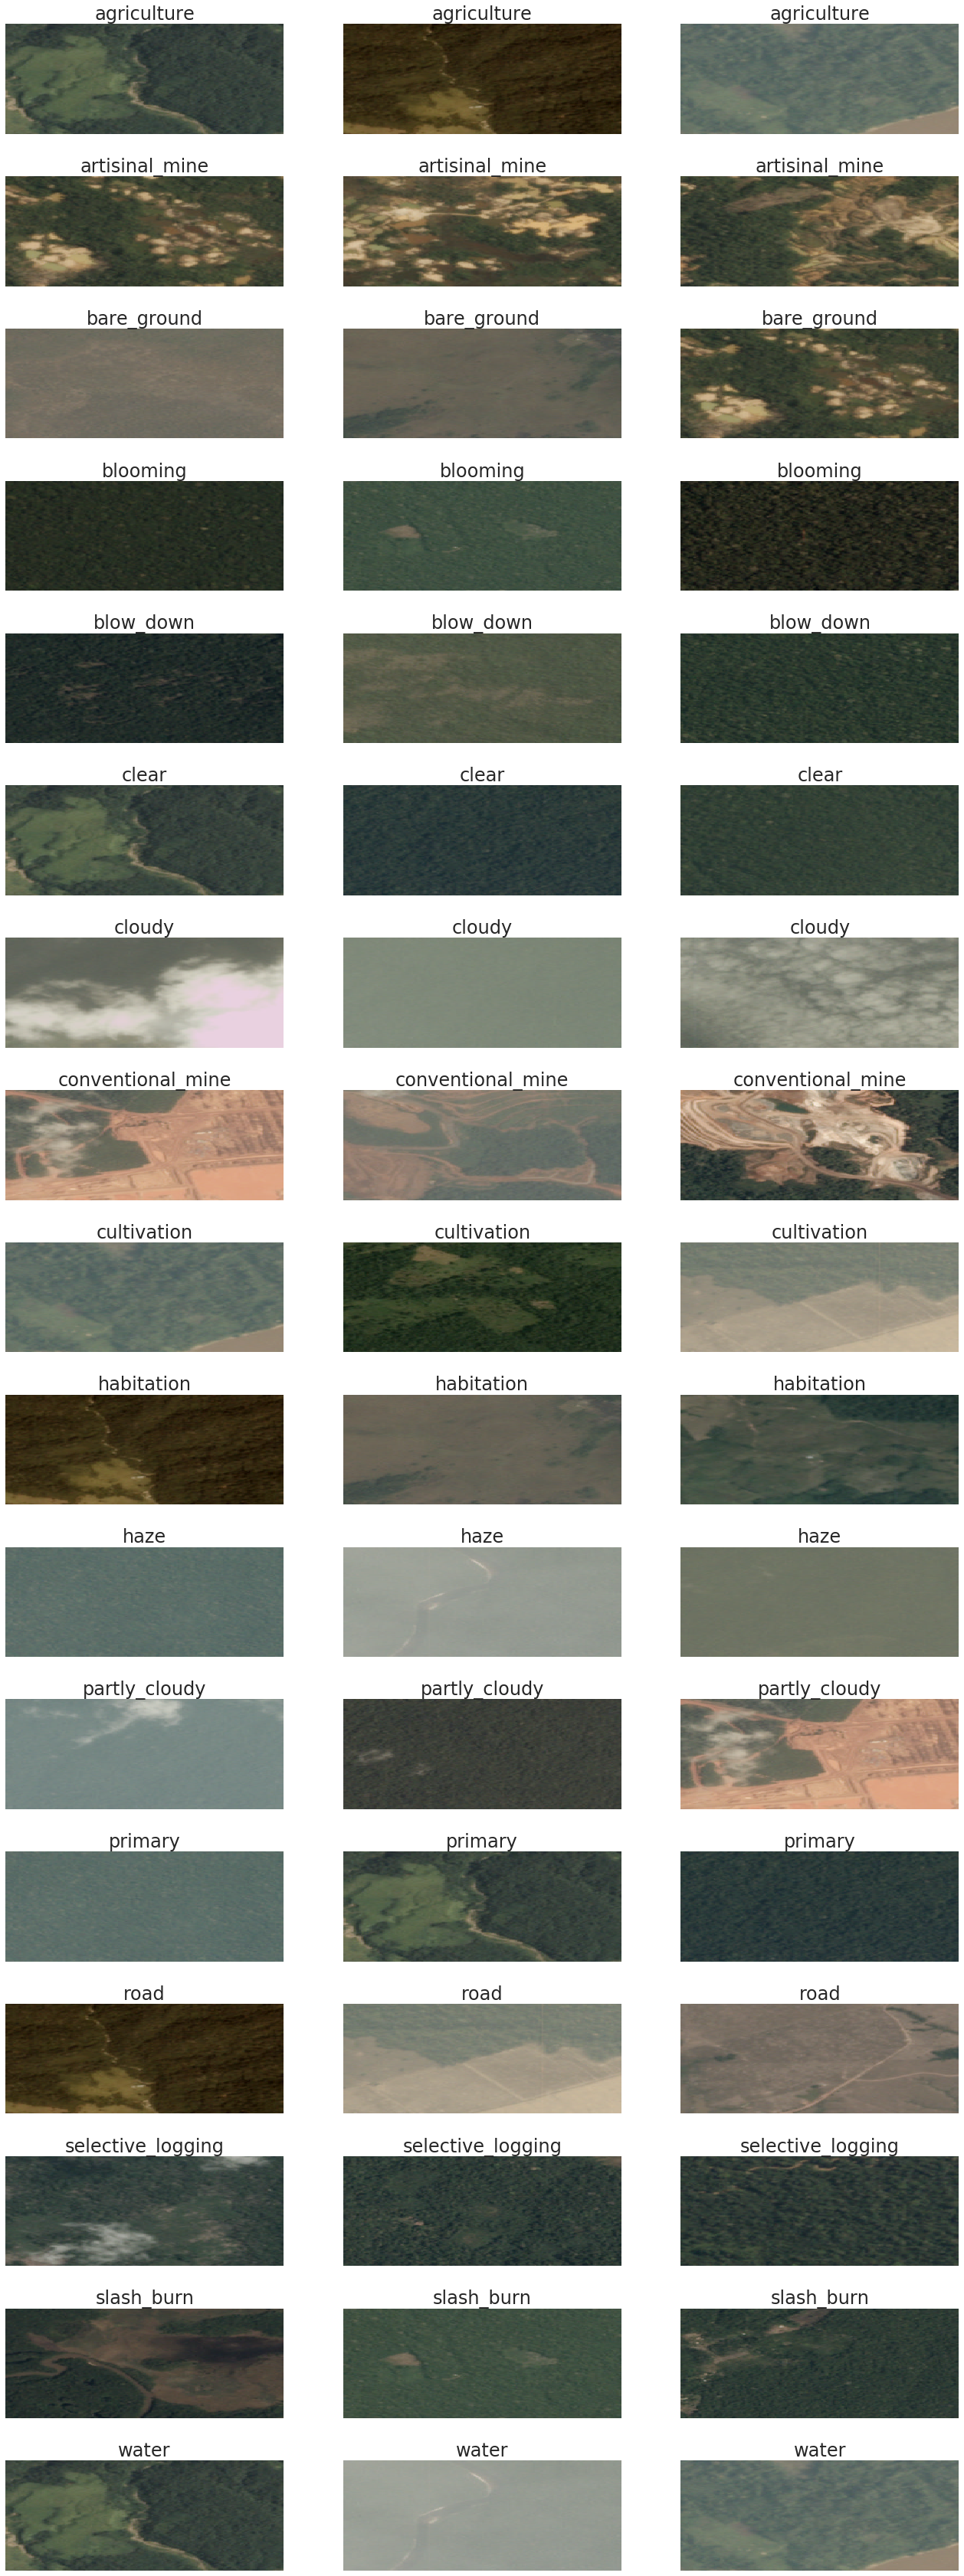

In [0]:
import matplotlib.image as mpimg
def show_images(image_list, label_list):
  fig = plt.figure(figsize = (18,50))
  for i, im in enumerate(image_list):
    plt.subplot(len(categories)+1, 3, i+1)
    image = mpimg.imread(im)
    plt.imshow(image,  interpolation='nearest', aspect='auto')
    plt.title(label_list[i])
    plt.tight_layout()
    plt.axis('off')
  plt.show()




show_images(sum(image_list, []), label_list)



- **Cloudy:** Imagen completamente nublada que no permite obtener observaciones adicionales.
- **Partly Cloudy:** Imagen parcialmente nublada.
- **Clear:** Imagen sin nubes.
- **Haze:** Imagen con neblina.
- **Primary (rainforest):** Presencia de bosque "virgen" o áreas con alta densidad de vegetación.
- **Water:** Presencia de ríos, embalses o lagos.
- **Habitation:** Presencia de casas o edificios.
- **Agriculture:** Porciones de tierra sin árboles siendo utilizadas para la agricultura.
- **Road:** Caminos o rutas.
- **Cultivation:** Es un subconjunto de Agriculture que se refiere a pequeñas granjas siendo explotadas por una persona o familia como medio de supervivencia.
- **Bare Ground:** Áreas sin presencia de árboles por causas naturales y no como resultado de la actividad humana.
- **Slash and Burn:** Áreas que han sido incendiadas recientemente.
- **Selective Logging:** Zonas de tala selectiva de especies de árboles de alto valor.
- **Blooming:** Es un fenómeno natural donde ciertas especies de árboles, eclosionan, dan frutos y florecen para aumentar las chances de polinización cruzada.
- **Conventional Mining:** Zona con presencia de minería legal a larga escala.
- **"Artisinal" Mining:** Operaciones de minería a baja escala, usualmente ilegales.
- **Blow Down:** Fenómeno natural que ocurre cuando el aire frío y seco de los Andes se asienta sobre el aire cálido y húmedo en la selva. Estos fuertes vientos derriban los árboles más grandes de la selva tropical, y las áreas abiertas resultantes son visibles desde el espacio.

## Data Augmentation

Proponga algún de pre-procesamiento y aumentado de datos, visualice los resultados del método propuesto. Puede experimentar y elegir el que mejor funcione en sus entrenamientos.

**Ayuda:** Al tener sus anotaciones en formato csv, lo mas sensillo sería utilizar el método [flow_from_dataframe](https://keras.io/preprocessing/image/#flow_from_dataframe) de la clase `ImageDataGenerator` de `Keras`.

- Se define en la clase Generators:

Tenemos dos conjuntos (train and validation) en los cuales se realizaron las siguientes operaciones:
 - rescale
 - horizontal_flip y vertical_flip
 - se dividio 80/20 para train/validation



```
_datagen = ImageDataGenerator(
            rescale=1./255,
            horizontal_flip=True, 
            vertical_flip=True,
            validation_split=0.2)
# Train generator
self.train_generator = _datagen.flow_from_dataframe(
    dataframe=dataset,
    directory='',
    x_col="image_name",
    y_col="tags",
    classes=labels,
    target_size=self.img_size,
    batch_size=self.batch_size,
    seed=42,
    shuffle=True,
    class_mode="categorical",
    subset='training')

# Validation generator
self.val_generator = _datagen.flow_from_dataframe(
    dataframe=dataset,
    directory='',
    x_col="image_name",
    y_col="tags",
    classes=labels,
    target_size=self.img_size,
    batch_size=self.batch_size,
    seed=42,
    shuffle=True,
    class_mode="categorical",
    subset='validation')    

```



### Example of data augmentation

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:336: UserWarning: This ImageDataGenerator specifies `zca_whitening`, which overrides setting of `featurewise_center`.
  warnings.warn('This ImageDataGenerator specifies '


Found 40479 validated image filenames belonging to 17 classes.


/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:716: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:735: UserWarning: This ImageDataGenerator specifies `zca_whitening`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


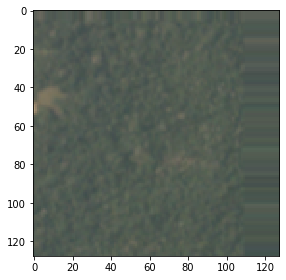

/usr/local/lib/python3.6/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:75: UserWarning: Low image data range; displaying image with stretched contrast.
  warn("Low image data range; displaying image with "


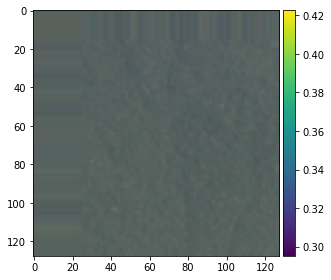

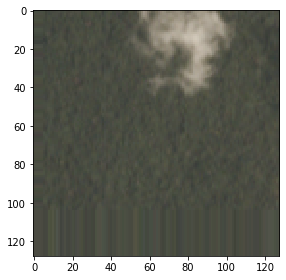

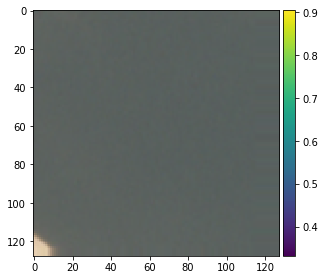

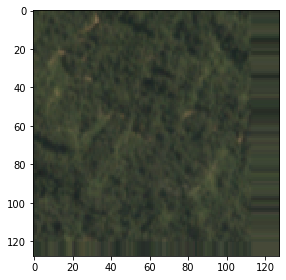

In [28]:
from skimage import io

_datagen = ImageDataGenerator(
            rescale=1./255,
            horizontal_flip=True, 
            vertical_flip=True,
            zca_whitening=True,
            width_shift_range=0.2,
            height_shift_range=0.2,
            validation_split=0.2)
train_generator = _datagen.flow_from_dataframe(
    dataframe=unpickled_df,
    directory='',
    x_col="image_name",
    y_col="tags",
    classes=categories,
    target_size=(128,128),
    batch_size=5,
    class_mode="categorical",
    )

def imshow(image_RGB):
  io.imshow(image_RGB)
  io.show()

x,y = train_generator.next()

for i in range(0,5):
    image = x[i]
    imshow(image)

## Modelo

Elija un modelo de red convolucional para entrenar sobre sus datos. Puede armar su propia red convolucional de cero o utilizar una de las provistas por `Keras` en [Applications](https://keras.io/applications/).

Piense como debería ser la capa de clasificación de su modelo y la función de costo a utilizar durante el entrenamiento al tratarse de un problema del tipo multi-label classification.

- Se seleccionó una última capa de clasificación *sigmoid* 
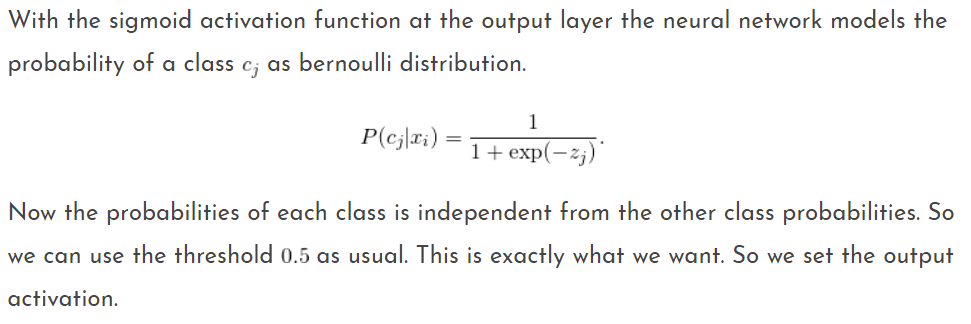
- Se seleccionó una función de costo  binary_crossentropy ya que se ajusta a el problema de clasificación multilabel de este dataset. Ésta función penaliza cada nodo independientemente. 
Documentacion:

```
Measures the probability error in discrete classification tasks in which each class is independent and not mutually exclusive. For instance, one could perform multilabel classification where a picture can contain both an elephant and a dog at the same time.
```



- La clase ModelTrainer contiene tres modelos:
  - create_basic
  - create_resnet50_weights
  - create_resnet50
  - vgg16

  Se realizaron entrenamientos en los tres modelos. 

### Codigo de model

Loaded dataset shape:  (40479, 2)
Found 32384 validated image filenames belonging to 17 classes.
Train generator created
Found 8095 validated image filenames belonging to 17 classes.
Validation generator created
Generators created
58892288/58889256 [==============================] - 1s 0us/step
Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 8, 8, 512)         14714688  
_________________________________________________________________
flatten_7 (Flatten)          (None, 32768)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               4194432   
_________________________________________________________________
dropout_6 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_4 (Dense)       

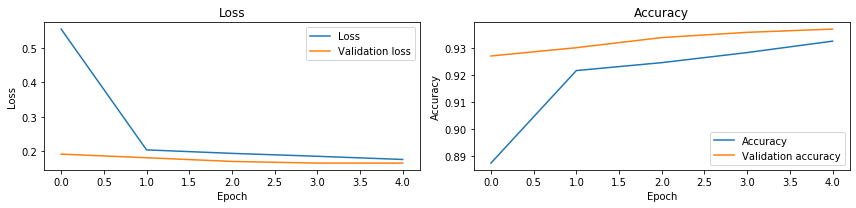

In [0]:
import tensorflow as tf
import tensorflow.keras.layers as Layers
import tensorflow.keras.activations as Actications
import tensorflow.keras.models as Models
import tensorflow.keras.optimizers as Optimizer
import tensorflow.keras.metrics as Metrics
import tensorflow.keras.utils as Utils
from keras.utils.vis_utils import model_to_dot
import os
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix as CM
from random import randint
from IPython.display import SVG
import matplotlib.gridspec as gridspec
import pandas as pd
from keras.preprocessing.image import ImageDataGenerator  
from keras.applications import densenet  
from keras.models import Sequential, Model, load_model  
from keras.layers import Conv2D, MaxPooling2D  
from keras.layers import Activation, Dropout, Flatten, Dense  
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint, Callback  
from keras import regularizers  
from keras import backend as K  
from tqdm import tqdm
from keras.preprocessing import image
from keras_preprocessing.image import ImageDataGenerator
from keras.applications import ResNet50, VGG16
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
import os
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"
# The GPU id to use, "0", "1", etc.
os.environ["CUDA_VISIBLE_DEVICES"] = "0" 

gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        # Currently, memory growth needs to be the same across GPUs
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
            
    except RuntimeError as e:
        # Memory growth must be set before GPUs have been initialized
        print(e)
    
class DataPreparation:

    def __init__(self, file_name):
        self.file_name = file_name
        
    def load_file(self):
        dataset = pd.read_pickle(self.file_name)
        labels = list(dataset.columns.values[2:])
        print("Loaded dataset shape: ", dataset.shape)
        #dataset = dataset[:10000]
        #print("New dataset shape: ", dataset.shape)
        return dataset, labels
    
class Generators:
    def __init__(self, dataset, labels, batch_size, img_size):
        self.batch_size=batch_size
        self.img_size=(img_size, img_size)
        
        _datagen = ImageDataGenerator(
            rescale=1./255,
            horizontal_flip=True, 
            vertical_flip=True,
            validation_split=0.2)
        
        self.train_generator = _datagen.flow_from_dataframe(
            dataframe=dataset,
            directory='',
            x_col="image_name",
            y_col="tags",
            classes=labels,
            target_size=self.img_size,
            batch_size=self.batch_size,
            seed=42,
            shuffle=True,
            class_mode="categorical",
            subset='training')
        print('Train generator created')
        # Validation generator
        self.val_generator = _datagen.flow_from_dataframe(
            dataframe=dataset,
            directory='',
            x_col="image_name",
            y_col="tags",
            classes=labels,
            target_size=self.img_size,
            batch_size=self.batch_size,
            seed=42,
            shuffle=True,
            class_mode="categorical",
            subset='validation')    
        print('Validation generator created')
        
    
class ModelTrainer:
    
    def __init__(self, generators):
        self.generators = generators
        self.img_width = generators.img_size[0]
        self.img_height = generators.img_size[1]
        
    def create_basic(self):
        model = Sequential()
        model.add(Conv2D(filters=16, kernel_size=(5, 5), activation="relu", input_shape=(self.img_width, self.img_height,3)))
        model.add(MaxPooling2D(pool_size=(2, 2)))
        model.add(Dropout(0.25))
        model.add(Flatten())
        model.add(Dense(64, activation='relu'))
        model.add(Dropout(0.5))
        model.add(Dense(17, activation='sigmoid'))
        model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])
        return model
      
    def create_resnet50_weights(self):
        base_model = ResNet50(input_shape=(self.img_width, self.img_height, 3),  
                      weights='imagenet',                           
                      include_top=False,                            
                      pooling='avg')
        
        x = base_model.output
        local_dense = Dense(1024, activation='relu',name='local_dense')(x)
        dropout = Dropout(0.3)(local_dense)
        # and a logistic layer
        predictions = Dense(17, activation='sigmoid',name='local_output')(dropout)

        # this is the model we will train
        model = Model(inputs=base_model.input, outputs=predictions)
        
        for layer in model.layers[:99]:
            layer.trainable = False
        for layer in model.layers[99:]:
            layer.trainable = True

        model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])            
        return model
        
    def create_resnet50(self):
        optimizer = Adam(0.003, decay=0.0005)
        base_model = ResNet50(weights=None, include_top=False, input_shape=(self.img_width, self.img_height, 3))

        for layer in base_model.layers:
            layer.trainable = True

        model = Sequential([
            base_model,
            Flatten(), 
            Dense(128, activation='relu',name='local_dense'),
            Dropout(0.2),
            Dense(17, activation='sigmoid',name='local_output')
            
        ])
        
        model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['acc'])
          
        return model

    def create_vgg16(self):
        optimizer = Adam(0.003, decay=0.0005)
        base_model = VGG16(weights='imagenet', include_top=False, input_shape=(self.img_width, self.img_height, 3))

        for layer in base_model.layers:
            layer.trainable = False
            
        model = Sequential([
            base_model,
            Flatten(), 
            Dense(128, activation='relu'),
            Dropout(0.2),
            Dense(17, activation='sigmoid')  
        ])

        model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['acc'])
        return model

    def add_callback(self, exp_name):
        if not os.path.exists(exp_name):
          os.makedirs(exp_name)
        self.callbacks = [
            EarlyStopping(monitor='val_loss', 
                          min_delta=0, 
                          patience=2, 
                          verbose=1, 
                          mode='auto', 
                          baseline=None, 
                          restore_best_weights=False),
            ModelCheckpoint(filepath=os.path.join(exp_name, 'weights.{epoch:02d}-{val_loss:.2f}.hdf5'),
                    monitor='val_loss', 
                    verbose=1, 
                    save_best_only=False, 
                    save_weights_only=False, 
                    mode='auto')
        ]

    def train_model(self, model, epochs):
        model_history = model.fit_generator(
                        self.generators.train_generator,
                        steps_per_epoch = self.generators.val_generator.samples // self.generators.batch_size,
                        validation_data = self.generators.val_generator, 
                        validation_steps = self.generators.val_generator.samples // self.generators.batch_size,
                        epochs=epochs,
                        callbacks=self.callbacks,
                        verbose=1)
        return model_history


class Evaluator:
     
    def __init__(self, training):
        self.training = training

    def plot_history(self):
        ## Trained model analysis and evaluation
        f, ax = plt.subplots(1,2, figsize=(12,3))
        ax[0].plot(self.training.history['loss'], label="Loss")
        ax[0].plot(self.training.history['val_loss'], label="Validation loss")
        ax[0].set_title('Loss')
        ax[0].set_xlabel('Epoch')
        ax[0].set_ylabel('Loss')
        ax[0].legend()

        # Accuracy
        ax[1].plot(self.training.history['acc'], label="Accuracy")
        ax[1].plot(self.training.history['val_acc'], label="Validation accuracy")
        ax[1].set_title('Accuracy')
        ax[1].set_xlabel('Epoch')
        ax[1].set_ylabel('Accuracy')
        ax[1].legend()
        plt.tight_layout()
        plt.show()
    

def main():
    # Train/test/validation split with balanced labels in train
    data_prep = DataPreparation("train-jpg-labels.pkl")
    dataset, labels = data_prep.load_file()
    
    IMG_SIZE = 256
    BATCH_SIZE = 128
    EPOCHS = 5
    NET_IMG_ROWS = 128
    NET_IMG_COLS = 128

    # Create generators        
    generators = Generators(dataset, labels,BATCH_SIZE, IMG_SIZE)
    print("Generators created")
    
    trainer = ModelTrainer(generators)
    model = trainer.create_vgg16()
    trainer.add_callback('vgg16_weights')
    print(model.summary())
    model_history = trainer.train_model(model, EPOCHS)
    
    # Create evaluator instance
    evaluator = Evaluator(model_history)
    # Draw accuracy and loss charts
    evaluator.plot_history()

    


main()

## Evaluacion de los modelos

### Caso 0: Prueba de modelo básico

Este modelo solo se utiliza para hacer una prueba general de los generadores, callback y demas funciones. 

```
Loaded dataset shape:  (40479, 2)
Found 32384 validated image filenames belonging to 17 classes.
Train generator created
Found 8095 validated image filenames belonging to 17 classes.
Validation generator created
Generators created
3/63 [==============================] - 96s 2s/step - loss: 1.1958 - acc: 0.8422 - val_loss: 0.6682 - val_acc: 0.9051

Epoch 00001: saving model to basic/weights.01-0.67.hdf5
Epoch 2/5
63/63 [==============================] - 96s 2s/step - loss: 0.6554 - acc: 0.9058 - val_loss: 0.6429 - val_acc: 0.9048

Epoch 00002: saving model to basic/weights.02-0.64.hdf5
Epoch 3/5
63/63 [==============================] - 100s 2s/step - loss: 0.6315 - acc: 0.9041 - val_loss: 0.6200 - val_acc: 0.9052

Epoch 00003: saving model to basic/weights.03-0.62.hdf5
Epoch 4/5
63/63 [==============================] - 96s 2s/step - loss: 0.6093 - acc: 0.9053 - val_loss: 0.5987 - val_acc: 0.9053

Epoch 00004: saving model to basic/weights.04-0.60.hdf5
Epoch 5/5
63/63 [==============================] - 97s 2s/step - loss: 0.5890 - acc: 0.9045 - val_loss: 0.5791 - val_acc: 0.9045

Epoch 00005: saving model to basic/weights.05-0.58.hdf5

```
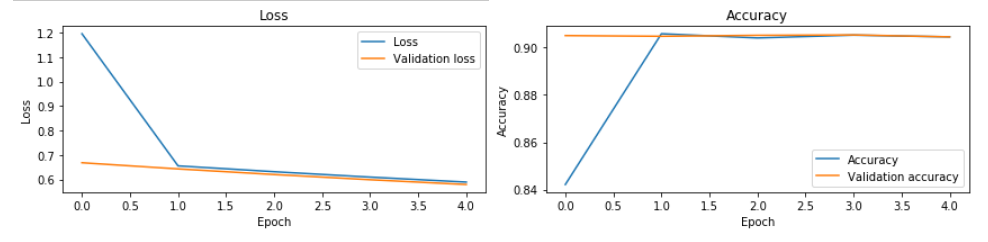


### Caso 1: Resnet básico 

1.   epochs: 5
2.   batchsize: 128
3.  No tiene weith load de resnet50






```
Loaded dataset shape:  (40479, 2)
Found 32384 validated image filenames belonging to 17 classes.
Train generator created
Found 8095 validated image filenames belonging to 17 classes.
Validation generator created
Generators created
/usr/local/lib/python3.6/dist-packages/keras_applications/resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
=================================================================
resnet50 (Model)             (None, 8, 8, 2048)        23587712  
_________________________________________________________________
flatten_1 (Flatten)          (None, 131072)            0         
_________________________________________________________________
local_dense (Dense)          (None, 128)               16777344  
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
local_output (Dense)         (None, 17)                2193      
=================================================================
Total params: 40,367,249
Trainable params: 40,314,129
Non-trainable params: 53,120

Epoch 1/5
63/63 [==============================] - 1520s 24s/step - loss: 1.9282 - acc: 0.8657 - val_loss: 22676792.0000 - val_acc: 0.7844
Epoch 2/5
63/63 [==============================] - 1560s 25s/step - loss: 0.2914 - acc: 0.9021 - val_loss: 5.1463 - val_acc: 0.8972
Epoch 3/5
63/63 [==============================] - 1526s 24s/step - loss: 0.2537 - acc: 0.9047 - val_loss: 0.2251 - val_acc: 0.9148
Epoch 4/5
63/63 [==============================] - 1522s 24s/step - loss: 0.2369 - acc: 0.9112 - val_loss: 0.2560 - val_acc: 0.9159
Epoch 5/5
63/63 [==============================] - 1548s 25s/step - loss: 0.2273 - acc: 0.9146 - val_loss: 0.2363 - val_acc: 0.9174

```



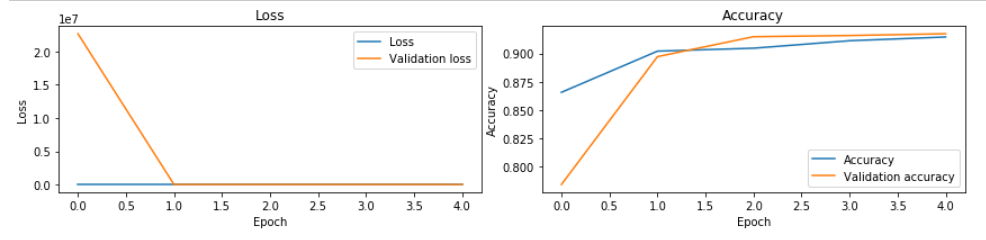

### Caso 2: Resnet50

Se ajusto el optimizer y ademas se agregaron callback

1.   epochs: 5
2.   batchsize: 128
3.   No tiene weith load de resnet50



```
Using TensorFlow backend.
Loaded dataset shape:  (40479, 2)
Found 32384 validated image filenames belonging to 17 classes.
Train generator created
Found 8095 validated image filenames belonging to 17 classes.
Validation generator created
Generators created
/usr/local/lib/python3.6/dist-packages/keras_applications/resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
=================================================================
resnet50 (Model)             (None, 8, 8, 2048)        23587712  
_________________________________________________________________
flatten_1 (Flatten)          (None, 131072)            0         
_________________________________________________________________
local_dense (Dense)          (None, 128)               16777344  
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
local_output (Dense)         (None, 17)                2193      
=================================================================
Total params: 40,367,249
Trainable params: 40,314,129
Non-trainable params: 53,120
_________________________________________________________________
None
Epoch 1/5
63/63 [==============================] - 1283s 20s/step - loss: 2.4665 - acc: 0.8752 - val_loss: 27322.0234 - val_acc: 0.8442

Epoch 00001: saving model to resnet50/weights.01-27322.02.hdf5
Epoch 2/5
63/63 [==============================] - 1288s 20s/step - loss: 0.2745 - acc: 0.9060 - val_loss: 5.2129 - val_acc: 0.8894

Epoch 00002: saving model to resnet50/weights.02-5.21.hdf5
Epoch 3/5
63/63 [==============================] - 1234s 20s/step - loss: 0.2378 - acc: 0.9116 - val_loss: 1.1676 - val_acc: 0.9150

Epoch 00003: saving model to resnet50/weights.03-1.17.hdf5
Epoch 4/5
63/63 [==============================] - 1298s 21s/step - loss: 0.2223 - acc: 0.9183 - val_loss: 0.2941 - val_acc: 0.9213

Epoch 00004: saving model to resnet50/weights.04-0.29.hdf5
Epoch 5/5
63/63 [==============================] - 1322s 21s/step - loss: 0.2201 - acc: 0.9176 - val_loss: 0.1996 - val_acc: 0.9226

Epoch 00005: saving model to resnet50/weights.05-0.20.hdf5
```

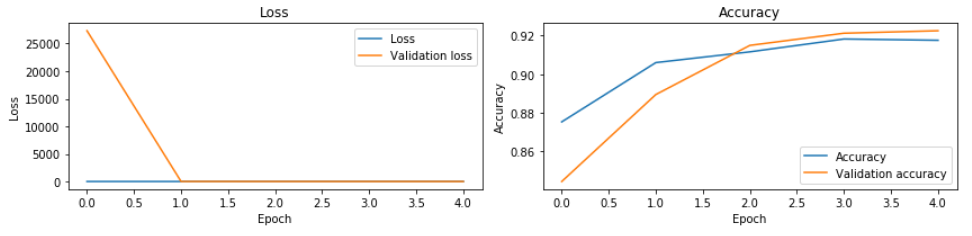

### Caso 3: Resnet50 con parámetros pre entrenados

- Se dejo las 99 primeras capas con los pesos pre entrenados.
- No se obtiene mejor resultado que si dejamos que se entrene desde cero toda la red. Se detiene por early stopping ya que no mejoran las metricas



```
Loaded dataset shape:  (40479, 2)
Found 32384 validated image filenames belonging to 17 classes.
Train generator created
Found 8095 validated image filenames belonging to 17 classes.
Validation generator created
Generators created
Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
==================================================================================================
input_7 (InputLayer)            (None, 256, 256, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 262, 262, 3)  0           input_7[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 128, 128, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 128, 128, 64) 256         conv1[0][0]                      
__________________________________________________________________________________________________
activation_295 (Activation)     (None, 128, 128, 64) 0           bn_conv1[0][0]                   
__________________________________________________________________________________________________
pool1_pad (ZeroPadding2D)       (None, 130, 130, 64) 0           activation_295[0][0]             
__________________________________________________________________________________________________
max_pooling2d_8 (MaxPooling2D)  (None, 64, 64, 64)   0           pool1_pad[0][0]                  
__________________________________________________________________________________________________
res2a_branch2a (Conv2D)         (None, 64, 64, 64)   4160        max_pooling2d_8[0][0]            
__________________________________________________________________________________________________
bn2a_branch2a (BatchNormalizati (None, 64, 64, 64)   256         res2a_branch2a[0][0]             
__________________________________________________________________________________________________
activation_296 (Activation)     (None, 64, 64, 64)   0           bn2a_branch2a[0][0]              
__________________________________________________________________________________________________
res2a_branch2b (Conv2D)         (None, 64, 64, 64)   36928       activation_296[0][0]             
__________________________________________________________________________________________________
bn2a_branch2b (BatchNormalizati (None, 64, 64, 64)   256         res2a_branch2b[0][0]             
__________________________________________________________________________________________________
activation_297 (Activation)     (None, 64, 64, 64)   0           bn2a_branch2b[0][0]              
__________________________________________________________________________________________________
res2a_branch2c (Conv2D)         (None, 64, 64, 256)  16640       activation_297[0][0]             
__________________________________________________________________________________________________
res2a_branch1 (Conv2D)          (None, 64, 64, 256)  16640       max_pooling2d_8[0][0]            
__________________________________________________________________________________________________
bn2a_branch2c (BatchNormalizati (None, 64, 64, 256)  1024        res2a_branch2c[0][0]             
__________________________________________________________________________________________________
bn2a_branch1 (BatchNormalizatio (None, 64, 64, 256)  1024        res2a_branch1[0][0]              
__________________________________________________________________________________________________
add_97 (Add)                    (None, 64, 64, 256)  0           bn2a_branch2c[0][0]              
                                                                 bn2a_branch1[0][0]               
__________________________________________________________________________________________________
activation_298 (Activation)     (None, 64, 64, 256)  0           add_97[0][0]                     
__________________________________________________________________________________________________
res2b_branch2a (Conv2D)         (None, 64, 64, 64)   16448       activation_298[0][0]             
__________________________________________________________________________________________________
bn2b_branch2a (BatchNormalizati (None, 64, 64, 64)   256         res2b_branch2a[0][0]             
__________________________________________________________________________________________________
activation_299 (Activation)     (None, 64, 64, 64)   0           bn2b_branch2a[0][0]              
__________________________________________________________________________________________________
res2b_branch2b (Conv2D)         (None, 64, 64, 64)   36928       activation_299[0][0]             
__________________________________________________________________________________________________
bn2b_branch2b (BatchNormalizati (None, 64, 64, 64)   256         res2b_branch2b[0][0]             
__________________________________________________________________________________________________
activation_300 (Activation)     (None, 64, 64, 64)   0           bn2b_branch2b[0][0]              
__________________________________________________________________________________________________
res2b_branch2c (Conv2D)         (None, 64, 64, 256)  16640       activation_300[0][0]             
__________________________________________________________________________________________________
bn2b_branch2c (BatchNormalizati (None, 64, 64, 256)  1024        res2b_branch2c[0][0]             
__________________________________________________________________________________________________
add_98 (Add)                    (None, 64, 64, 256)  0           bn2b_branch2c[0][0]              
                                                                 activation_298[0][0]             
__________________________________________________________________________________________________
activation_301 (Activation)     (None, 64, 64, 256)  0           add_98[0][0]                     
__________________________________________________________________________________________________
res2c_branch2a (Conv2D)         (None, 64, 64, 64)   16448       activation_301[0][0]             
__________________________________________________________________________________________________
bn2c_branch2a (BatchNormalizati (None, 64, 64, 64)   256         res2c_branch2a[0][0]             
__________________________________________________________________________________________________
activation_302 (Activation)     (None, 64, 64, 64)   0           bn2c_branch2a[0][0]              
__________________________________________________________________________________________________
res2c_branch2b (Conv2D)         (None, 64, 64, 64)   36928       activation_302[0][0]             
__________________________________________________________________________________________________
bn2c_branch2b (BatchNormalizati (None, 64, 64, 64)   256         res2c_branch2b[0][0]             
__________________________________________________________________________________________________
activation_303 (Activation)     (None, 64, 64, 64)   0           bn2c_branch2b[0][0]              
__________________________________________________________________________________________________
res2c_branch2c (Conv2D)         (None, 64, 64, 256)  16640       activation_303[0][0]             
__________________________________________________________________________________________________
bn2c_branch2c (BatchNormalizati (None, 64, 64, 256)  1024        res2c_branch2c[0][0]             
__________________________________________________________________________________________________
add_99 (Add)                    (None, 64, 64, 256)  0           bn2c_branch2c[0][0]              
                                                                 activation_301[0][0]             
__________________________________________________________________________________________________
activation_304 (Activation)     (None, 64, 64, 256)  0           add_99[0][0]                     
__________________________________________________________________________________________________
res3a_branch2a (Conv2D)         (None, 32, 32, 128)  32896       activation_304[0][0]             
__________________________________________________________________________________________________
bn3a_branch2a (BatchNormalizati (None, 32, 32, 128)  512         res3a_branch2a[0][0]             
__________________________________________________________________________________________________
activation_305 (Activation)     (None, 32, 32, 128)  0           bn3a_branch2a[0][0]              
__________________________________________________________________________________________________
res3a_branch2b (Conv2D)         (None, 32, 32, 128)  147584      activation_305[0][0]             
__________________________________________________________________________________________________
bn3a_branch2b (BatchNormalizati (None, 32, 32, 128)  512         res3a_branch2b[0][0]             
__________________________________________________________________________________________________
activation_306 (Activation)     (None, 32, 32, 128)  0           bn3a_branch2b[0][0]              
__________________________________________________________________________________________________
res3a_branch2c (Conv2D)         (None, 32, 32, 512)  66048       activation_306[0][0]             
__________________________________________________________________________________________________
res3a_branch1 (Conv2D)          (None, 32, 32, 512)  131584      activation_304[0][0]             
__________________________________________________________________________________________________
bn3a_branch2c (BatchNormalizati (None, 32, 32, 512)  2048        res3a_branch2c[0][0]             
__________________________________________________________________________________________________
bn3a_branch1 (BatchNormalizatio (None, 32, 32, 512)  2048        res3a_branch1[0][0]              
__________________________________________________________________________________________________
add_100 (Add)                   (None, 32, 32, 512)  0           bn3a_branch2c[0][0]              
                                                                 bn3a_branch1[0][0]               
__________________________________________________________________________________________________
activation_307 (Activation)     (None, 32, 32, 512)  0           add_100[0][0]                    
__________________________________________________________________________________________________
res3b_branch2a (Conv2D)         (None, 32, 32, 128)  65664       activation_307[0][0]             
__________________________________________________________________________________________________
bn3b_branch2a (BatchNormalizati (None, 32, 32, 128)  512         res3b_branch2a[0][0]             
__________________________________________________________________________________________________
activation_308 (Activation)     (None, 32, 32, 128)  0           bn3b_branch2a[0][0]              
__________________________________________________________________________________________________
res3b_branch2b (Conv2D)         (None, 32, 32, 128)  147584      activation_308[0][0]             
__________________________________________________________________________________________________
bn3b_branch2b (BatchNormalizati (None, 32, 32, 128)  512         res3b_branch2b[0][0]             
__________________________________________________________________________________________________
activation_309 (Activation)     (None, 32, 32, 128)  0           bn3b_branch2b[0][0]              
__________________________________________________________________________________________________
res3b_branch2c (Conv2D)         (None, 32, 32, 512)  66048       activation_309[0][0]             
__________________________________________________________________________________________________
bn3b_branch2c (BatchNormalizati (None, 32, 32, 512)  2048        res3b_branch2c[0][0]             
__________________________________________________________________________________________________
add_101 (Add)                   (None, 32, 32, 512)  0           bn3b_branch2c[0][0]              
                                                                 activation_307[0][0]             
__________________________________________________________________________________________________
activation_310 (Activation)     (None, 32, 32, 512)  0           add_101[0][0]                    
__________________________________________________________________________________________________
res3c_branch2a (Conv2D)         (None, 32, 32, 128)  65664       activation_310[0][0]             
__________________________________________________________________________________________________
bn3c_branch2a (BatchNormalizati (None, 32, 32, 128)  512         res3c_branch2a[0][0]             
__________________________________________________________________________________________________
activation_311 (Activation)     (None, 32, 32, 128)  0           bn3c_branch2a[0][0]              
__________________________________________________________________________________________________
res3c_branch2b (Conv2D)         (None, 32, 32, 128)  147584      activation_311[0][0]             
__________________________________________________________________________________________________
bn3c_branch2b (BatchNormalizati (None, 32, 32, 128)  512         res3c_branch2b[0][0]             
__________________________________________________________________________________________________
activation_312 (Activation)     (None, 32, 32, 128)  0           bn3c_branch2b[0][0]              
__________________________________________________________________________________________________
res3c_branch2c (Conv2D)         (None, 32, 32, 512)  66048       activation_312[0][0]             
__________________________________________________________________________________________________
bn3c_branch2c (BatchNormalizati (None, 32, 32, 512)  2048        res3c_branch2c[0][0]             
__________________________________________________________________________________________________
add_102 (Add)                   (None, 32, 32, 512)  0           bn3c_branch2c[0][0]              
                                                                 activation_310[0][0]             
__________________________________________________________________________________________________
activation_313 (Activation)     (None, 32, 32, 512)  0           add_102[0][0]                    
__________________________________________________________________________________________________
res3d_branch2a (Conv2D)         (None, 32, 32, 128)  65664       activation_313[0][0]             
__________________________________________________________________________________________________
bn3d_branch2a (BatchNormalizati (None, 32, 32, 128)  512         res3d_branch2a[0][0]             
__________________________________________________________________________________________________
activation_314 (Activation)     (None, 32, 32, 128)  0           bn3d_branch2a[0][0]              
__________________________________________________________________________________________________
res3d_branch2b (Conv2D)         (None, 32, 32, 128)  147584      activation_314[0][0]             
__________________________________________________________________________________________________
bn3d_branch2b (BatchNormalizati (None, 32, 32, 128)  512         res3d_branch2b[0][0]             
__________________________________________________________________________________________________
activation_315 (Activation)     (None, 32, 32, 128)  0           bn3d_branch2b[0][0]              
__________________________________________________________________________________________________
res3d_branch2c (Conv2D)         (None, 32, 32, 512)  66048       activation_315[0][0]             
__________________________________________________________________________________________________
bn3d_branch2c (BatchNormalizati (None, 32, 32, 512)  2048        res3d_branch2c[0][0]             
__________________________________________________________________________________________________
add_103 (Add)                   (None, 32, 32, 512)  0           bn3d_branch2c[0][0]              
                                                                 activation_313[0][0]             
__________________________________________________________________________________________________
activation_316 (Activation)     (None, 32, 32, 512)  0           add_103[0][0]                    
__________________________________________________________________________________________________
res4a_branch2a (Conv2D)         (None, 16, 16, 256)  131328      activation_316[0][0]             
__________________________________________________________________________________________________
bn4a_branch2a (BatchNormalizati (None, 16, 16, 256)  1024        res4a_branch2a[0][0]             
__________________________________________________________________________________________________
activation_317 (Activation)     (None, 16, 16, 256)  0           bn4a_branch2a[0][0]              
__________________________________________________________________________________________________
res4a_branch2b (Conv2D)         (None, 16, 16, 256)  590080      activation_317[0][0]             
__________________________________________________________________________________________________
bn4a_branch2b (BatchNormalizati (None, 16, 16, 256)  1024        res4a_branch2b[0][0]             
__________________________________________________________________________________________________
activation_318 (Activation)     (None, 16, 16, 256)  0           bn4a_branch2b[0][0]              
__________________________________________________________________________________________________
res4a_branch2c (Conv2D)         (None, 16, 16, 1024) 263168      activation_318[0][0]             
__________________________________________________________________________________________________
res4a_branch1 (Conv2D)          (None, 16, 16, 1024) 525312      activation_316[0][0]             
__________________________________________________________________________________________________
bn4a_branch2c (BatchNormalizati (None, 16, 16, 1024) 4096        res4a_branch2c[0][0]             
__________________________________________________________________________________________________
bn4a_branch1 (BatchNormalizatio (None, 16, 16, 1024) 4096        res4a_branch1[0][0]              
__________________________________________________________________________________________________
add_104 (Add)                   (None, 16, 16, 1024) 0           bn4a_branch2c[0][0]              
                                                                 bn4a_branch1[0][0]               
__________________________________________________________________________________________________
activation_319 (Activation)     (None, 16, 16, 1024) 0           add_104[0][0]                    
__________________________________________________________________________________________________
res4b_branch2a (Conv2D)         (None, 16, 16, 256)  262400      activation_319[0][0]             
__________________________________________________________________________________________________
bn4b_branch2a (BatchNormalizati (None, 16, 16, 256)  1024        res4b_branch2a[0][0]             
__________________________________________________________________________________________________
activation_320 (Activation)     (None, 16, 16, 256)  0           bn4b_branch2a[0][0]              
__________________________________________________________________________________________________
res4b_branch2b (Conv2D)         (None, 16, 16, 256)  590080      activation_320[0][0]             
__________________________________________________________________________________________________
bn4b_branch2b (BatchNormalizati (None, 16, 16, 256)  1024        res4b_branch2b[0][0]             
__________________________________________________________________________________________________
activation_321 (Activation)     (None, 16, 16, 256)  0           bn4b_branch2b[0][0]              
__________________________________________________________________________________________________
res4b_branch2c (Conv2D)         (None, 16, 16, 1024) 263168      activation_321[0][0]             
__________________________________________________________________________________________________
bn4b_branch2c (BatchNormalizati (None, 16, 16, 1024) 4096        res4b_branch2c[0][0]             
__________________________________________________________________________________________________
add_105 (Add)                   (None, 16, 16, 1024) 0           bn4b_branch2c[0][0]              
                                                                 activation_319[0][0]             
__________________________________________________________________________________________________
activation_322 (Activation)     (None, 16, 16, 1024) 0           add_105[0][0]                    
__________________________________________________________________________________________________
res4c_branch2a (Conv2D)         (None, 16, 16, 256)  262400      activation_322[0][0]             
__________________________________________________________________________________________________
bn4c_branch2a (BatchNormalizati (None, 16, 16, 256)  1024        res4c_branch2a[0][0]             
__________________________________________________________________________________________________
activation_323 (Activation)     (None, 16, 16, 256)  0           bn4c_branch2a[0][0]              
__________________________________________________________________________________________________
res4c_branch2b (Conv2D)         (None, 16, 16, 256)  590080      activation_323[0][0]             
__________________________________________________________________________________________________
bn4c_branch2b (BatchNormalizati (None, 16, 16, 256)  1024        res4c_branch2b[0][0]             
__________________________________________________________________________________________________
activation_324 (Activation)     (None, 16, 16, 256)  0           bn4c_branch2b[0][0]              
__________________________________________________________________________________________________
res4c_branch2c (Conv2D)         (None, 16, 16, 1024) 263168      activation_324[0][0]             
__________________________________________________________________________________________________
bn4c_branch2c (BatchNormalizati (None, 16, 16, 1024) 4096        res4c_branch2c[0][0]             
__________________________________________________________________________________________________
add_106 (Add)                   (None, 16, 16, 1024) 0           bn4c_branch2c[0][0]              
                                                                 activation_322[0][0]             
__________________________________________________________________________________________________
activation_325 (Activation)     (None, 16, 16, 1024) 0           add_106[0][0]                    
__________________________________________________________________________________________________
res4d_branch2a (Conv2D)         (None, 16, 16, 256)  262400      activation_325[0][0]             
__________________________________________________________________________________________________
bn4d_branch2a (BatchNormalizati (None, 16, 16, 256)  1024        res4d_branch2a[0][0]             
__________________________________________________________________________________________________
activation_326 (Activation)     (None, 16, 16, 256)  0           bn4d_branch2a[0][0]              
__________________________________________________________________________________________________
res4d_branch2b (Conv2D)         (None, 16, 16, 256)  590080      activation_326[0][0]             
__________________________________________________________________________________________________
bn4d_branch2b (BatchNormalizati (None, 16, 16, 256)  1024        res4d_branch2b[0][0]             
__________________________________________________________________________________________________
activation_327 (Activation)     (None, 16, 16, 256)  0           bn4d_branch2b[0][0]              
__________________________________________________________________________________________________
res4d_branch2c (Conv2D)         (None, 16, 16, 1024) 263168      activation_327[0][0]             
__________________________________________________________________________________________________
bn4d_branch2c (BatchNormalizati (None, 16, 16, 1024) 4096        res4d_branch2c[0][0]             
__________________________________________________________________________________________________
add_107 (Add)                   (None, 16, 16, 1024) 0           bn4d_branch2c[0][0]              
                                                                 activation_325[0][0]             
__________________________________________________________________________________________________
activation_328 (Activation)     (None, 16, 16, 1024) 0           add_107[0][0]                    
__________________________________________________________________________________________________
res4e_branch2a (Conv2D)         (None, 16, 16, 256)  262400      activation_328[0][0]             
__________________________________________________________________________________________________
bn4e_branch2a (BatchNormalizati (None, 16, 16, 256)  1024        res4e_branch2a[0][0]             
__________________________________________________________________________________________________
activation_329 (Activation)     (None, 16, 16, 256)  0           bn4e_branch2a[0][0]              
__________________________________________________________________________________________________
res4e_branch2b (Conv2D)         (None, 16, 16, 256)  590080      activation_329[0][0]             
__________________________________________________________________________________________________
bn4e_branch2b (BatchNormalizati (None, 16, 16, 256)  1024        res4e_branch2b[0][0]             
__________________________________________________________________________________________________
activation_330 (Activation)     (None, 16, 16, 256)  0           bn4e_branch2b[0][0]              
__________________________________________________________________________________________________
res4e_branch2c (Conv2D)         (None, 16, 16, 1024) 263168      activation_330[0][0]             
__________________________________________________________________________________________________
bn4e_branch2c (BatchNormalizati (None, 16, 16, 1024) 4096        res4e_branch2c[0][0]             
__________________________________________________________________________________________________
add_108 (Add)                   (None, 16, 16, 1024) 0           bn4e_branch2c[0][0]              
                                                                 activation_328[0][0]             
__________________________________________________________________________________________________
activation_331 (Activation)     (None, 16, 16, 1024) 0           add_108[0][0]                    
__________________________________________________________________________________________________
res4f_branch2a (Conv2D)         (None, 16, 16, 256)  262400      activation_331[0][0]             
__________________________________________________________________________________________________
bn4f_branch2a (BatchNormalizati (None, 16, 16, 256)  1024        res4f_branch2a[0][0]             
__________________________________________________________________________________________________
activation_332 (Activation)     (None, 16, 16, 256)  0           bn4f_branch2a[0][0]              
__________________________________________________________________________________________________
res4f_branch2b (Conv2D)         (None, 16, 16, 256)  590080      activation_332[0][0]             
__________________________________________________________________________________________________
bn4f_branch2b (BatchNormalizati (None, 16, 16, 256)  1024        res4f_branch2b[0][0]             
__________________________________________________________________________________________________
activation_333 (Activation)     (None, 16, 16, 256)  0           bn4f_branch2b[0][0]              
__________________________________________________________________________________________________
res4f_branch2c (Conv2D)         (None, 16, 16, 1024) 263168      activation_333[0][0]             
__________________________________________________________________________________________________
bn4f_branch2c (BatchNormalizati (None, 16, 16, 1024) 4096        res4f_branch2c[0][0]             
__________________________________________________________________________________________________
add_109 (Add)                   (None, 16, 16, 1024) 0           bn4f_branch2c[0][0]              
                                                                 activation_331[0][0]             
__________________________________________________________________________________________________
activation_334 (Activation)     (None, 16, 16, 1024) 0           add_109[0][0]                    
__________________________________________________________________________________________________
res5a_branch2a (Conv2D)         (None, 8, 8, 512)    524800      activation_334[0][0]             
__________________________________________________________________________________________________
bn5a_branch2a (BatchNormalizati (None, 8, 8, 512)    2048        res5a_branch2a[0][0]             
__________________________________________________________________________________________________
activation_335 (Activation)     (None, 8, 8, 512)    0           bn5a_branch2a[0][0]              
__________________________________________________________________________________________________
res5a_branch2b (Conv2D)         (None, 8, 8, 512)    2359808     activation_335[0][0]             
__________________________________________________________________________________________________
bn5a_branch2b (BatchNormalizati (None, 8, 8, 512)    2048        res5a_branch2b[0][0]             
__________________________________________________________________________________________________
activation_336 (Activation)     (None, 8, 8, 512)    0           bn5a_branch2b[0][0]              
__________________________________________________________________________________________________
res5a_branch2c (Conv2D)         (None, 8, 8, 2048)   1050624     activation_336[0][0]             
__________________________________________________________________________________________________
res5a_branch1 (Conv2D)          (None, 8, 8, 2048)   2099200     activation_334[0][0]             
__________________________________________________________________________________________________
bn5a_branch2c (BatchNormalizati (None, 8, 8, 2048)   8192        res5a_branch2c[0][0]             
__________________________________________________________________________________________________
bn5a_branch1 (BatchNormalizatio (None, 8, 8, 2048)   8192        res5a_branch1[0][0]              
__________________________________________________________________________________________________
add_110 (Add)                   (None, 8, 8, 2048)   0           bn5a_branch2c[0][0]              
                                                                 bn5a_branch1[0][0]               
__________________________________________________________________________________________________
activation_337 (Activation)     (None, 8, 8, 2048)   0           add_110[0][0]                    
__________________________________________________________________________________________________
res5b_branch2a (Conv2D)         (None, 8, 8, 512)    1049088     activation_337[0][0]             
__________________________________________________________________________________________________
bn5b_branch2a (BatchNormalizati (None, 8, 8, 512)    2048        res5b_branch2a[0][0]             
__________________________________________________________________________________________________
activation_338 (Activation)     (None, 8, 8, 512)    0           bn5b_branch2a[0][0]              
__________________________________________________________________________________________________
res5b_branch2b (Conv2D)         (None, 8, 8, 512)    2359808     activation_338[0][0]             
__________________________________________________________________________________________________
bn5b_branch2b (BatchNormalizati (None, 8, 8, 512)    2048        res5b_branch2b[0][0]             
__________________________________________________________________________________________________
activation_339 (Activation)     (None, 8, 8, 512)    0           bn5b_branch2b[0][0]              
__________________________________________________________________________________________________
res5b_branch2c (Conv2D)         (None, 8, 8, 2048)   1050624     activation_339[0][0]             
__________________________________________________________________________________________________
bn5b_branch2c (BatchNormalizati (None, 8, 8, 2048)   8192        res5b_branch2c[0][0]             
__________________________________________________________________________________________________
add_111 (Add)                   (None, 8, 8, 2048)   0           bn5b_branch2c[0][0]              
                                                                 activation_337[0][0]             
__________________________________________________________________________________________________
activation_340 (Activation)     (None, 8, 8, 2048)   0           add_111[0][0]                    
__________________________________________________________________________________________________
res5c_branch2a (Conv2D)         (None, 8, 8, 512)    1049088     activation_340[0][0]             
__________________________________________________________________________________________________
bn5c_branch2a (BatchNormalizati (None, 8, 8, 512)    2048        res5c_branch2a[0][0]             
__________________________________________________________________________________________________
activation_341 (Activation)     (None, 8, 8, 512)    0           bn5c_branch2a[0][0]              
__________________________________________________________________________________________________
res5c_branch2b (Conv2D)         (None, 8, 8, 512)    2359808     activation_341[0][0]             
__________________________________________________________________________________________________
bn5c_branch2b (BatchNormalizati (None, 8, 8, 512)    2048        res5c_branch2b[0][0]             
__________________________________________________________________________________________________
activation_342 (Activation)     (None, 8, 8, 512)    0           bn5c_branch2b[0][0]              
__________________________________________________________________________________________________
res5c_branch2c (Conv2D)         (None, 8, 8, 2048)   1050624     activation_342[0][0]             
__________________________________________________________________________________________________
bn5c_branch2c (BatchNormalizati (None, 8, 8, 2048)   8192        res5c_branch2c[0][0]             
__________________________________________________________________________________________________
add_112 (Add)                   (None, 8, 8, 2048)   0           bn5c_branch2c[0][0]              
                                                                 activation_340[0][0]             
__________________________________________________________________________________________________
activation_343 (Activation)     (None, 8, 8, 2048)   0           add_112[0][0]                    
__________________________________________________________________________________________________
global_average_pooling2d_7 (Glo (None, 2048)         0           activation_343[0][0]             
__________________________________________________________________________________________________
local_dense (Dense)             (None, 1024)         2098176     global_average_pooling2d_7[0][0] 
__________________________________________________________________________________________________
dropout_5 (Dropout)             (None, 1024)         0           local_dense[0][0]                
__________________________________________________________________________________________________
local_output (Dense)            (None, 17)           17425       dropout_5[0][0]                  
==================================================================================================
Total params: 25,703,313
Trainable params: 21,831,697
Non-trainable params: 3,871,616
__________________________________________________________________________________________________
Epoch 1/5
63/63 [==============================] - 654s 10s/step - loss: 0.1849 - acc: 0.9382 - val_loss: 0.4505 - val_acc: 0.7790

Epoch 00001: saving model to resnet50_weights/weights.01-0.45.hdf5
Epoch 2/5
63/63 [==============================] - 621s 10s/step - loss: 0.1214 - acc: 0.9572 - val_loss: 0.4155 - val_acc: 0.7787

Epoch 00002: saving model to resnet50_weights/weights.02-0.42.hdf5
Epoch 3/5
63/63 [==============================] - 636s 10s/step - loss: 0.1073 - acc: 0.9590 - val_loss: 0.4569 - val_acc: 0.7789

Epoch 00003: saving model to resnet50_weights/weights.03-0.46.hdf5
Epoch 4/5
63/63 [==============================] - 631s 10s/step - loss: 0.1026 - acc: 0.9614 - val_loss: 0.8743 - val_acc: 0.7792

Epoch 00004: saving model to resnet50_weights/weights.04-0.87.hdf5
Epoch 00004: early stopping
```

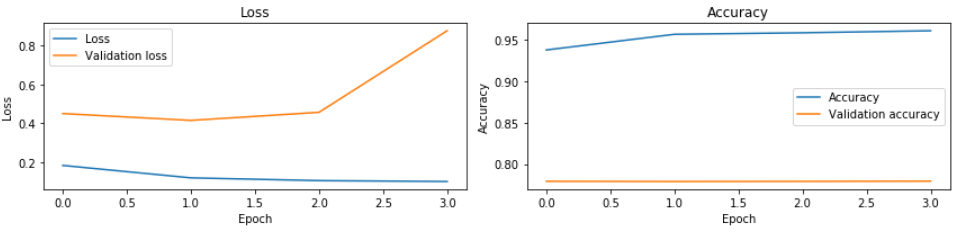



### Caso 4: VGG16 with weight




```
Loaded dataset shape:  (40479, 2)
Found 32384 validated image filenames belonging to 17 classes.
Train generator created
Found 8095 validated image filenames belonging to 17 classes.
Validation generator created
Generators created
Downloading data from https://github.com/fchollet/deep-learning-models/releases/download/v0.1/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5
58892288/58889256 [==============================] - 1s 0us/step
Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
=================================================================
vgg16 (Model)                (None, 8, 8, 512)         14714688  
_________________________________________________________________
flatten_7 (Flatten)          (None, 32768)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               4194432   
_________________________________________________________________
dropout_6 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 17)                2193      
=================================================================
Total params: 18,911,313
Trainable params: 4,196,625
Non-trainable params: 14,714,688
_________________________________________________________________
Epoch 1/5
63/63 [==============================] - 614s 10s/step - loss: 0.5542 - acc: 0.8876 - val_loss: 0.1918 - val_acc: 0.9271

Epoch 00001: saving model to vgg16_weights/weights.01-0.19.hdf5
Epoch 2/5
63/63 [==============================] - 595s 9s/step - loss: 0.2040 - acc: 0.9217 - val_loss: 0.1814 - val_acc: 0.9302

Epoch 00002: saving model to vgg16_weights/weights.02-0.18.hdf5
Epoch 3/5
63/63 [==============================] - 589s 9s/step - loss: 0.1940 - acc: 0.9247 - val_loss: 0.1705 - val_acc: 0.9339

Epoch 00003: saving model to vgg16_weights/weights.03-0.17.hdf5
Epoch 4/5
63/63 [==============================] - 589s 9s/step - loss: 0.1855 - acc: 0.9284 - val_loss: 0.1658 - val_acc: 0.9358

Epoch 00004: saving model to vgg16_weights/weights.04-0.17.hdf5
Epoch 5/5
63/63 [==============================] - 590s 9s/step - loss: 0.1763 - acc: 0.9326 - val_loss: 0.1657 - val_acc: 0.9370

Epoch 00005: saving model to vgg16_weights/weights.05-0.17.hdf5
```

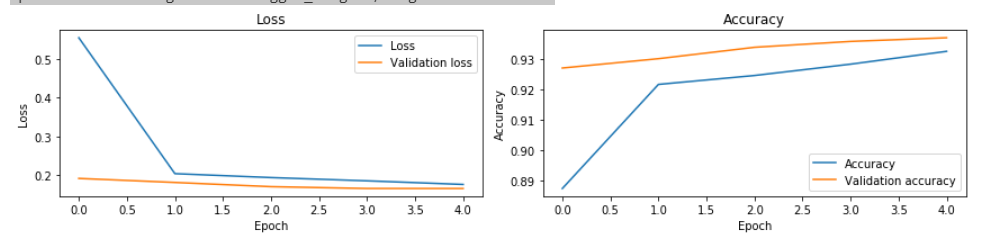


## Conclusión

- Mejor resultado es el vgg16 con val_acc 0.937
- Probablemente con mas epocas mejore el accuracy,